<center> <h1>Portfolio statistics and the CAPM</h1> </center>

<center>William Mann</center>

<center>
<img src="https://wgjm1986.github.io/Investments/Emory_small.png" height="200px" width="300px" />
</center>                                                                                            

## A different perspective on the optimal portfolio

Suppose an investor currently holds the risky portfolio p, and she is thinking about increasing her holding of investment i.

Remember that she wants to increase the Sharpe ratio of p.

It turns out that adding more of i will do this if
$$
SR_i > \rho_{ip} \times SR_p
$$

**Definition**: The “beta” of investment i with respect to portfolio p is
$$
\beta_{ip}
\equiv
\rho_{ip} \times \frac{\sigma_i}{\sigma_p}
$$

Then we can say that the investor will want to hold more of i if
$$
\mathbb{E}[r_i - r_f ]
>
\beta_{ip} \times \mathbb{E}[r_p - r_f ]
$$

## Investment analysis based on $\beta_{ip}$ and $\alpha_{ip}$

- We can think of $\beta_{ip} \times \mathbb{E}[r_p − r_f]$ as the hurdle rate for someone holding portfolio p to decide they want to add more of i.

- This leads us to two important statistics:

$$
\beta_{ip} = \rho_{ip} \times \frac{\sigma_i}{\sigma_p}
$$

$$
\alpha_{ip} = \mathbb{E}[r_i - r_f ] - \beta_{ip} \times \mathbb{E}[r_p − r_f ]
$$

We call these “the beta and alpha of i with respect to p.”

- $\beta_{ip}$ determines the hurdle rate someone applies to an investment.

- $\alpha_{ip}$ measures by how much the investment beats the hurdle rate.

## Two ways to think about β

1. β is a rescaled version of the correlation ρ:
If ρ is low, then the hurdle rate $\beta_{ip}\times \mathbb{E}[r_p-r_f]$ is low,
reflecting the value of diversification.
But β, unlike ρ, can be greater than 1:
    - $\beta_{ip} > 1$ means that $\sigma_p$ grows when we add a bit more of i to p.
    - $\beta_{ip} < 1$ means that $\sigma_p$ shrinks. 
    - $\beta_{ip} = 1$ means it does not change.

2. β and α are also the statistics in the following regression model:
$$
(r_{it} − r_{ft} ) = \alpha_{ip} + \beta_{ip} \times (r_{pt} − r_{ft} ) + \varepsilon_{ipt}
$$

If you gather data and create a scatter plot of $r_{it}$ against $r_{pt}$,
then $\beta_{ip}$ is the slope of the best-fit line, and $\alpha_{ip}$ is its intercept.

## The information ratio

We can define one more important statistic, the **information ratio**:
$$
\text{IR}_{ip} \quad = \quad \frac{\alpha_{ip}}{\sigma(\varepsilon_{ipt})}
$$

If an investor currently holds $p$, and is considering whether to add more of $i$,
the *maximum* Sharpe ratio they can achieve from this is

$$
SR_{\text{max}} = \sqrt{ SR_{p}^2 + IR_{ip}^2 }
$$
(textbook formula 8.26)

$\sigma(\varepsilon_{ipt})$ is the standard deviation of $\varepsilon_{ipt}$ from the prior slide.
We can also calculate it as: 
$$ 
\sigma( \varepsilon_{ipt} ) = \sqrt{ \sigma_i^2 - \beta_{ip}^2 \sigma_p^2 }
$$
Like the Sharpe ratio, the IR is not affected by leverage.

## From portfolio theory to the CAPM

Portfolio theory tells us what a mean-variance investor should do, given their predictions about μ, σ, and ρ.
The Capital Asset Pricing Model (CAPM) asks what would happen, if all investors actually followed this advice, and made the same forecasts:
- With the same forecasts, they choose the same risky portfolio.
- The only portfolio they can all choose is the market portfolio.
- So, it must in fact have the highest possible Sharpe ratio.
- Then all investments have zero α with respect to it.
- More precisely, the best *prediction* of α is always zero.  
We will always find investments with nonzero α in past data.  
But the CAPM says you could not have picked them in advance.

## The Capital Asset Pricing Model (CAPM)

Conclusion: The best prediction about every investment is that

$$
\mathbb{E}[r_i − r_f ] = \beta_{im} × \mathbb{E}[r_m − r_f ]
$$

This appears similar to our earlier formula, but says much more:
- Portfolio theory says what an individual should do, but does not make any predictions about what will actually happen.
- The CAPM does: It predicts that all investments have zero α.
If some investment had a positive α, then all investors should try
to buy it, and prices should simply adjust until that α disappears.
- In other words, the CAPM describes an equilibrium.

## The CAPM uses ideas from portfolio theory

The logic behind the CAPM formula is really just portfolio theory,
applied to the case of an investor who holds the market portfolio:
- $\beta_{im}$ is a (rescaled) correlation with the market portfolio.
It is also the slope of the best-fit line from regressing $r_i$ on $r_m$.
- $\alpha_{im}$ measures whether investment i beats its hurdle rate.
It is also the intercept of the same best-fit regression line.
- Suppose we start from the market portfolio and add more of i.  
$\beta_{im} \lessgtr 1$ tells us whether portfolio volatility grows or shrinks,  
$\alpha_{im} \lessgtr 0$ tells us whether portfolio Sharpe ratio grows or shrinks.

Again, the new thing is the prediction that $\alpha_{im}$ is always zero.

This also means $IR_{im} = 0$, so indexing is the best strategy.

## The market portfolio in theory and in practice

- The CAPM gives a special role to the “market portfolio,” which theoretically includes *every* risky investment.

- To use the CAPM, we need to measure the market portfolio’s return, in order to estimate $\beta_{im}$. This is clearly a difficult task.

- Most investment in the US is allocated to the stock market, and the average stock investor holds a value-weighted portfolio.

- So, *in practice,* people typically represent the market portfolio with a large, value-weighted portfolio of US stocks.

- Be aware that this is a big simplification of the theory. The “true” market portfolio would include not only stocks, but also corporate bonds, real estate, commodities, etc...

## What does market risk look like?

Here’s a view of the market portfolio, as it is usually measured:
This figure plots monthly returns on the VFINX index fund.

In [1]:
%%capture

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import os
import wrds
import fredapi
import math
import numpy as np
import quandl

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16.0, 8.0]
from scipy.optimize import minimize

import statsmodels.formula.api as sm

conn = wrds.Connection(wrds_username='wmann')

FF3F = conn.get_table(library='ff_all',table='factors_monthly')
FF3F['month'] = pd.to_datetime(FF3F['date']).dt.to_period('M')
FF3F = FF3F.drop('date',axis=1).drop('dateff',axis=1).set_index('month')
riskfree = FF3F.rf.astype('float64')
riskfree = riskfree['2012':'2016']

VFINX_crsp_fundno = conn.raw_sql("select crsp_fundno, ticker from crsp_q_mutualfunds.fund_hdr where ticker = 'VFINX'").reset_index().crsp_fundno[0]
VFINX = conn.raw_sql("select caldt, mret from crsp_q_mutualfunds.monthly_returns where crsp_fundno = " + str(VFINX_crsp_fundno))
# Convert string date to datetime
VFINX = VFINX.set_index( pd.to_datetime(VFINX.set_index('caldt').index) ).drop('caldt',axis=1)
# Aggregate to monthly level
VFINX['month'] = VFINX.index.to_period('M')
VFINX = (VFINX.set_index('month') + 1).groupby('month').prod() - 1
VFINX.columns = ['VFINX']

conn.close()

VFINX_excess = VFINX['VFINX']['2012':'2016'] - pd.DataFrame(riskfree['2012':'2016'])['rf']
VFINX_fig,ax = plt.subplots()
VFINX_excess.plot(ax=ax,color='gray')

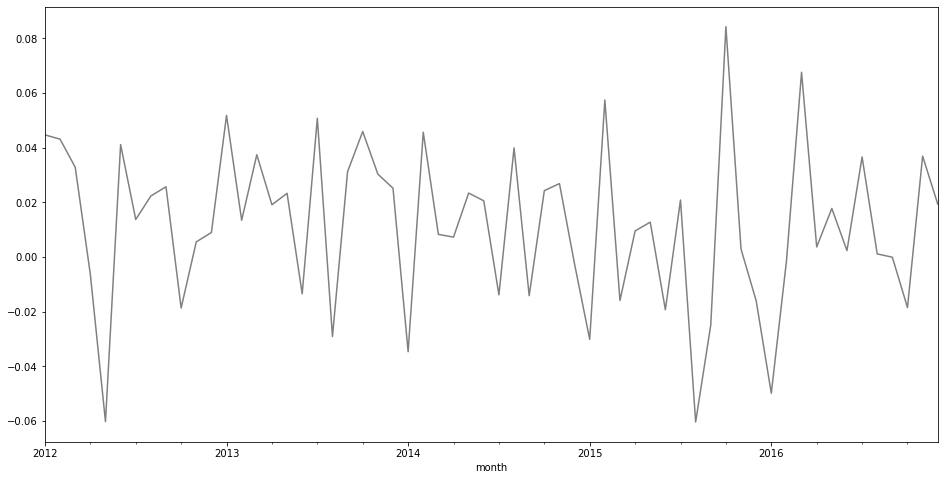

In [2]:
VFINX_fig

## What does market risk look like?

Add in the return of an ETF of retail stocks, with dividends reinvested.

The ETF's monthly return has 3% volatility and a market $\beta$ of 1.09.

In [3]:
%%capture

conn = wrds.Connection(wrds_username='wmann')
XRT_crsp_fundno = conn.raw_sql("select crsp_fundno, ticker from crsp_q_mutualfunds.fund_hdr where ticker = 'XRT'").reset_index().crsp_fundno[0]
XRT = conn.raw_sql("select caldt, mret from crsp_q_mutualfunds.monthly_returns where crsp_fundno = " + str(XRT_crsp_fundno))
conn.close()

# Convert string date to datetime
XRT = XRT.set_index( pd.to_datetime(XRT.set_index('caldt').index) ).drop('caldt',axis=1)
# Aggregate to monthly level
XRT['month'] = XRT.index.to_period('M')
XRT = (XRT.set_index('month') + 1).groupby('month').prod() - 1
XRT.columns = ['XRT']

XRT_excess = XRT['XRT']['2012':'2016'] - pd.DataFrame(riskfree['2012':'2016'])['rf']
VFINX_XRT_fig,ax = plt.subplots()
VFINX_excess['2012':'2016'].plot(ax=ax,color='gray')
XRT_excess['2012':'2016'].plot(ax=ax,color='blue')

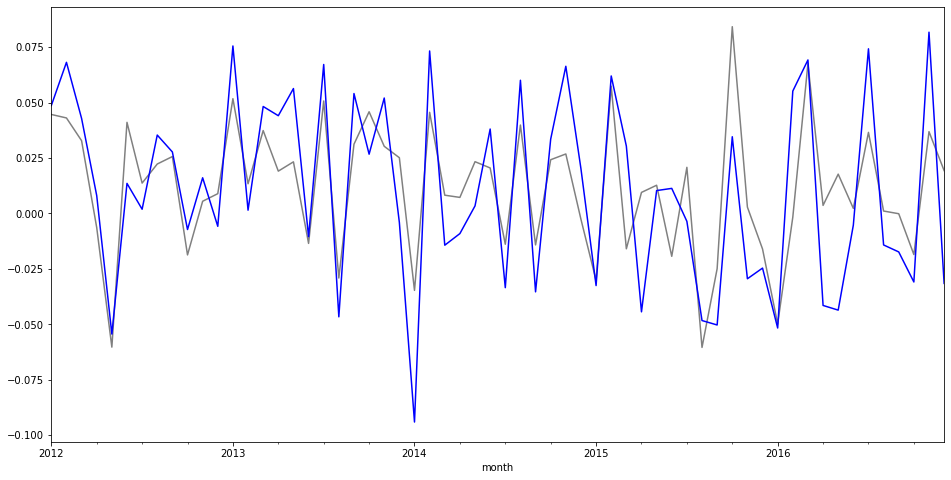

In [4]:
VFINX_XRT_fig

## What does market risk look like?

Replace the retail ETF with a gold ETF.
This ETF's monthly return has 5% volatility, but a beta of only 0.09.

In [5]:
%%capture
conn = wrds.Connection(wrds_username='wmann')
GLD_crsp_fundno = conn.raw_sql("select crsp_fundno, ticker from crsp_q_mutualfunds.fund_hdr where ticker = 'GLD'").reset_index().crsp_fundno[0]
GLD = conn.raw_sql("select caldt, mret from crsp_q_mutualfunds.monthly_returns where crsp_fundno = " + str(GLD_crsp_fundno))
conn.close()
# Convert string date to datetime
GLD = GLD.set_index( pd.to_datetime(GLD.set_index('caldt').index) ).drop('caldt',axis=1)
# Aggregate to monthly level
GLD['month'] = GLD.index.to_period('M')
GLD = (GLD.set_index('month') + 1).groupby('month').prod() - 1
GLD.columns = ['GLD']

GLD_excess = GLD['GLD']['2012':'2016'] - pd.DataFrame(riskfree['2012':'2016'])['rf']
VFINX_GLD_fig,ax = plt.subplots()
VFINX_excess['2012':'2016'].plot(ax=ax,color='gray')
GLD_excess['2012':'2016'].plot(ax=ax,color='blue')

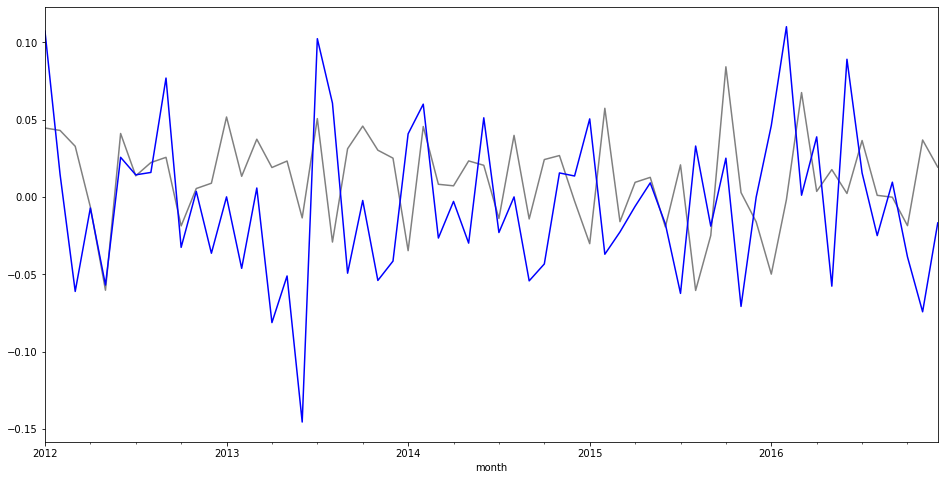

In [6]:
VFINX_GLD_fig

## What does market risk look like?

Here’s a different view of the same data on the retail ETF return:  
β is the slope of the best-fit line in the figure. Here, β = 1.09.

In [7]:
%%capture

# Define function to compactly estimate a best-fit line
def best_fit(y,x):
    from statsmodels.api import add_constant
    from statsmodels.regression.linear_model import OLS
    params = list( OLS(y,add_constant(x),hasconst=True).fit().params )
    alpha = params[0]
    beta = params[1]
    return alpha,beta

In [8]:
%%capture

# Generate new figure
XRT_VFINX_scatter,ax = plt.subplots()
# Scatter plot returns
plt.scatter(VFINX_excess['2012':'2016'],XRT_excess['2012':'2016'])
# Add best-fit line
alpha,beta = best_fit(XRT_excess['2012':'2016'],VFINX_excess['2012':'2016'])
ax.axline([0,alpha],[1,alpha+beta],color='orange')
# Add axes
ax.axline([0,0],[1,0],color='black',linewidth=0.5)
ax.axline([0,0],[0,1],color='black',linewidth=0.5)
# Set range of axes
ax.set_xlim([-0.15,0.15])
ax.set_ylim([-0.15,0.15])

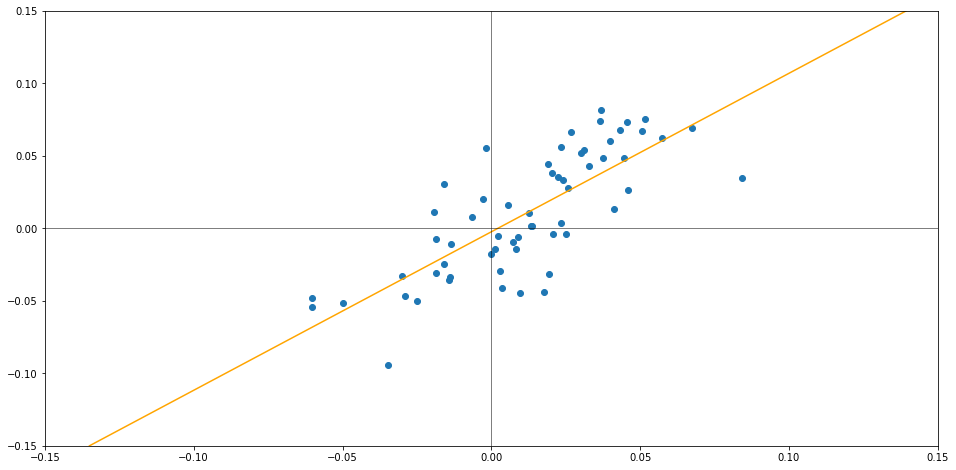

In [9]:
XRT_VFINX_scatter

## What does market risk look like?

A similar figure using the gold ETF:  
The line here is almost flat, with slope (beta) of 0.09

In [10]:
%%capture

# Generate new figure
GLD_VFINX_scatter,ax = plt.subplots()
# Scatter plot returns
plt.scatter(VFINX_excess['2012':'2016'],GLD_excess['2012':'2016'])
# Add best-fit line
b,m = best_fit(GLD_excess['2012':'2016'],VFINX_excess['2012':'2016'])
ax.axline([0,b],[1,m+b],color='orange')
# Add axes
ax.axline([0,0],[1,0],color='black',linewidth=0.5)
ax.axline([0,0],[0,1],color='black',linewidth=0.5)
# Set range of axes
ax.set_xlim([-0.15,0.15])
ax.set_ylim([-0.15,0.15])

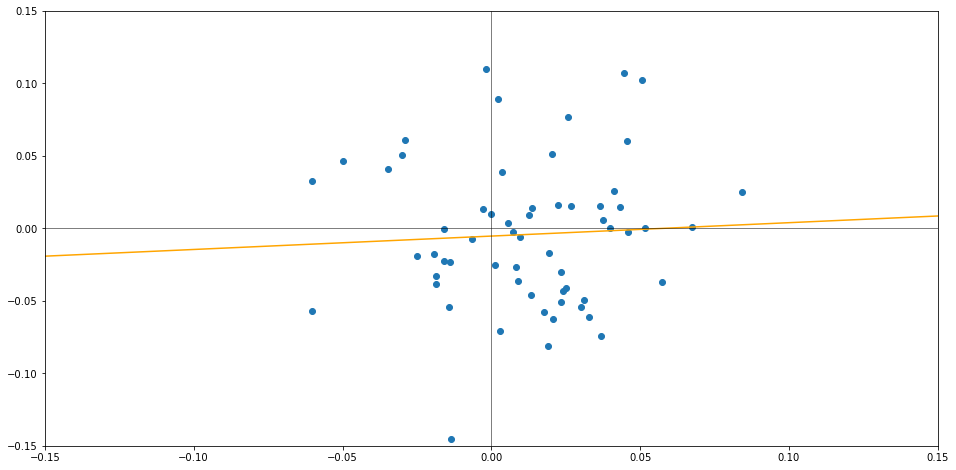

In [11]:
GLD_VFINX_scatter

## β as a correlation

β is the slope of a regression line like the prior ones.

Again, one way to interpret this number is that it measures a
relationship between the investment and the market.

- β = 2: Moves twice as far as the market, on average.
- β = 0.5: Moves half as far as the market, on average.
- The market portfolio itself has a beta of 1.
- A risk-free investment has a beta of zero.
- A risky investment can also have a beta of zero!  
Gold is a risky investment with approximately zero beta.

The CAPM focuses only on β, so it predicts (correctly) that gold earns low average returns despite having high volatility.

## β as non-diversifiable risk

A related interpretation is that β measures "non-diversifiable" risk.
- Gold has a low beta because its returns, while very volatile,
have very little economic connection to the overall market.
- Adding gold decreases the market portfolio’s volatility (β < 1).
We call this idiosyncratic risk or diversifiable risk.
- By contrast, retail stocks have a very high beta, because the
performance of these stocks is closely tied to the overall market.
- When you increase holdings of retail stocks in your market
portfolio, their risk reinforces the volatility you were already
exposed to, and your portfolo volatility slightly increases (β > 1).
We call this market risk, non-diversifiable risk, or systematic risk.

The CAPM says that investors only care about *non*-diversifiable risk.

Diversifiable risk does not matter to them, because it disappears when the investment is added to their portfolio.

## Application: The analysis of Homework 2

We will reproduce the results of that assignment, and then see how the formulas from this week are another path to the same answers.

In [12]:
# Risk-free rate from the Fama and French data
conn = wrds.Connection(wrds_username='wmann')
FF3F = conn.get_table(library='ff_all',table='factors_monthly')
conn.close()
FF3F['month'] = pd.to_datetime(FF3F['date']).dt.to_period('M')
FF3F = FF3F.drop('date',axis=1).drop('dateff',axis=1).set_index('month')
riskfree = FF3F.rf.astype('float64')
riskfree = riskfree['2008':'2023']

Loading library list...
Done


In [13]:
# Gold data from LBMA
LBMA_token_string = open('/home/william/LBMA_token.txt').read().rstrip()
Gold = quandl.get("LBMA/GOLD",authtoken=LBMA_token_string)
Gold = Gold['USD (AM)']
Gold = Gold.reset_index().resample('M',on='Date')['USD (AM)'].agg(['last'])
Gold['month'] = Gold.index.to_period('M')
Gold = Gold.reset_index().drop('Date',axis=1).set_index('month')
Gold.columns = ['Gold']
Gold = Gold / Gold.shift() - 1
Gold = Gold['2008':'2023']

In [14]:
# VFINX returns from WRDS
conn = wrds.Connection(wrds_username='wmann')
VFINX_crsp_fundno = conn.raw_sql("select crsp_fundno, ticker from crsp_q_mutualfunds.fund_hdr where ticker = 'VFINX'").reset_index().crsp_fundno[0]
VFINX = conn.raw_sql("select caldt, mret from crsp_q_mutualfunds.monthly_returns where crsp_fundno = " + str(VFINX_crsp_fundno))
conn.close()
# Convert string date to datetime
VFINX = VFINX.set_index( pd.to_datetime(VFINX.set_index('caldt').index) ).drop('caldt',axis=1)
# Aggregate to monthly level
VFINX['month'] = VFINX.index.to_period('M')
VFINX = (VFINX.set_index('month') + 1).groupby('month').prod() - 1
VFINX.columns = ['VFINX']
VFINX = VFINX['2008':'2023']

Loading library list...
Done


In [15]:
# Combine all datasets together
HWdata = VFINX.join(Gold.join(riskfree))['2008':'2023']

In [16]:
try: os.remove("Homework 2 example.xlsx")
except OSError: pass

# set up custom ExcelWriter engine to get the date format correct in the output file
writer = pd.ExcelWriter('Homework 2 example.xlsx', engine='xlsxwriter', datetime_format= "yyyy-mm")

HWdata.to_excel(writer,sheet_name='Data')

writer.close()

I have already downloaded the data on VFINX, gold, and risk-free returns into a dataframe. Here are the first four months:

In [17]:
HWdata[0:4]

,VFINX,Gold,rf
month,,,
2008-01,-0.060155,0.104304,0.0021
2008-02,-0.032515,0.048985,0.0013
2008-03,-0.004405,-0.032766,0.0017
2008-04,0.048542,-0.074153,0.0018


First step: Calculate excess returns

In [18]:
HWdata['VFINX_excess'] = HWdata['VFINX'] - HWdata['rf']
HWdata['Gold_excess'] = HWdata['Gold'] - HWdata['rf']
HWdata[0:4]

,VFINX,Gold,rf,VFINX_excess,Gold_excess
month,,,,,
2008-01,-0.060155,0.104304,0.0021,-0.062255,0.102204
2008-02,-0.032515,0.048985,0.0013,-0.033815,0.047685
2008-03,-0.004405,-0.032766,0.0017,-0.006105,-0.034466
2008-04,0.048542,-0.074153,0.0018,0.046742,-0.075953


In the homework we found the portfolio with the highest Sharpe ratio. 
Let's quickly calculate that answer again, using the matrix formulas form last week:

In [19]:
Sigma = np.cov( [ HWdata['Gold_excess'] , HWdata['VFINX_excess'] ] )
mu = [ HWdata['Gold_excess'].mean() , HWdata['VFINX_excess'].mean() ]
Optimal_weights_unscaled = np.linalg.inv(Sigma) @ mu
Optimal_weights = (
    Optimal_weights_unscaled / Optimal_weights_unscaled.sum()
    )
Optimal_Gold_weight, Optimal_VFINX_weight = Optimal_weights

print("The portfolio with the highest Sharpe ratio is:")
print(f" {100*Optimal_Gold_weight :.3f}% Gold,")
print(f" {100*Optimal_VFINX_weight :.3f}% VFINX.")

Optimal_mu = Optimal_weights @ mu
Optimal_sigma = np.sqrt( Optimal_weights @ (Sigma @ Optimal_weights) )
Optimal_SR = Optimal_mu / Optimal_sigma

print(f"It has a Sharpe ratio of {Optimal_SR :.5f}.")

The portfolio with the highest Sharpe ratio is:
 35.044% Gold,
 64.956% VFINX.
It has a Sharpe ratio of 0.19769.


### Using the Sharpe ratio formula from above

Now let's look at the first formula from this week. It say that we want to increase allocation to any investment $i$ as long as $SR_i > \rho_{ip} \times SR_p$, where $p$ is the portfolio we currently hold.

Let's apply this formula to the homework analysis, with gold playing the role of investment $i$ and VFINX the portfolio $p$.

First we calculate the Sharpe ratio of gold:

In [20]:
Gold_SR = HWdata['Gold_excess'].mean() / HWdata['Gold_excess'].std()
print(f"Sharpe ratio of gold: {Gold_SR :.5f}")

Sharpe ratio of gold: 0.10652


Now imagine we start off holding just VFINX, and are considering whether to allocate some to gold.
Calculate the Sharpe ratio of VFINX by itself, and the correlation of gold with VFINX.

In [21]:
VFINX_SR = HWdata['VFINX_excess'].mean() / HWdata['VFINX_excess'].std()
Corr_Gold_VFINX = np.corrcoef(
    [ HWdata['VFINX_excess'] , HWdata['Gold_excess'] ]
    )[0,1]

print(f"Sharpe ratio of VFINX: {VFINX_SR :.5f}")
print(f"Correlation of gold with VFINX: {Corr_Gold_VFINX :.5f}")
print(f"Multiply these two together: {VFINX_SR*Corr_Gold_VFINX :.5f}")

Sharpe ratio of VFINX: 0.17349
Correlation of gold with VFINX: 0.06893
Multiply these two together: 0.01196


Because the Sharpe ratio of gold was greater than this, we conclude that we can achieve a higher portfolio Sharpe ratio if we allocate *some* amount to gold.

Now suppose we try an allocation of 20% to gold. We can simulate the returns of this allocation, and then redo the 
calculations just above with this new allocation playing the role of $p$, our current portfolio.

In [22]:
HWdata['Gold20'] = 0.2*HWdata['Gold_excess']+0.8*HWdata['VFINX_excess']
Gold20_SR = HWdata['Gold20'].mean() / HWdata['Gold20'].std()
Corr_Gold_Gold20 = np.corrcoef(
    [HWdata['Gold_excess'],HWdata['Gold20']]
    )[0,1]

print(f"Sharpe ratio of an allocation 20% gold, 80% VFINX: {Gold20_SR :.5f}")
print(f"Correlation of gold with this allocation: {Corr_Gold_Gold20 :.5f}")
print(f"Multiply these two together: {Gold20_SR*Corr_Gold_Gold20 :.5f}")

Sharpe ratio of an allocation 20% gold, 80% VFINX: 0.19169
Correlation of gold with this allocation: 0.31633
Multiply these two together: 0.06064


The result is still less than the Sharpe ratio of gold by itself that we calculated earlier. So we conclude that we should allocate more than 20% to gold. 

We can repeat this process by trial and error (or by coding up an optimizer to do it for us).
It will eventually settle down to the answer we found in Homework 2.
Let's verify that once we reach that answer, the two sides of the equation are exactly equal.

In [23]:
HWdata['Optimal'] = (
    Optimal_weights @ [HWdata['Gold_excess'] , HWdata['VFINX_excess']]
    )
Optimal_SR = HWdata['Optimal'].mean() / HWdata['Optimal'].std()
Corr_Optimal_Gold = np.corrcoef(
    [ HWdata['Optimal'] , HWdata['Gold_excess'] ]
    )[0,1]

print(f"Sharpe ratio of gold: {Gold_SR :.5f}")
print(f"Sharpe ratio of optimal portfolio from HW2: {Optimal_SR :.5f}")
print(f"Correlation of optimal portfolio with gold: {Corr_Optimal_Gold :.5f}")
print(f"Multiply the last two numbers: {Optimal_SR*Corr_Optimal_Gold :.5f}" )

Sharpe ratio of gold: 0.10652
Sharpe ratio of optimal portfolio from HW2: 0.19769
Correlation of optimal portfolio with gold: 0.53880
Multiply the last two numbers: 0.10652


So this allocation to gold achieves the highest possible Sharpe ratio in our historical data.

## Formula with alpha

The next formula from this week said that we want to add more allocation to an investment $i$ as long as it has positive $\alpha$ with respect to our current portfolio.

$\alpha$ measures how much an investment outperforms its hurdle rate:
$$
\alpha_{ip} = \mathbb{E}[r_i-r_f] - \beta_{ip}\times\mathbb{E}[r_p-r_f]
$$

We can estimate it in either of two ways:

1. Substitute the average excess returns on $i$ and $p$ into the expected values above.

2. Get the intercept from a regression of excess returns of $i$ on excess returns of $p$,

$$
(r_{it}-r_{ft}) = \alpha_{ip} + \beta_{ip}\times(r_{pt} - r_{ft}) + \varepsilon_{ipt}
$$

Let's see how these formulas show up in the analysis from Homework 2.

First we check that gold has a positive $\alpha$ with respect to VFINX. In the regression table below, the number labeled "Intercept" is our estimate of $\alpha$. The number labeled VFINX is our estimate of $\beta$.

In [24]:
regression = sm.ols("Gold_excess ~ VFINX_excess",data=HWdata)
regression.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0047,0.004,1.291,0.198,-0.002,0.012
VFINX_excess,0.0727,0.076,0.952,0.342,-0.078,0.223


We can interpret $\alpha$ as a monthly return. So, we would say that, in our historical data, gold delivers 0.47% per month more than its appropriate hurdle rate based on its $\beta_{ip}$ with respect to our current portolio of holding only VFINX. 

The value of 0.0582 for $\beta$ is very low and effectively zero. This tells us that gold has almost no correlation with the performance of the overall stock market (represented by VFINX), even though gold is very volatile on its own.

Since we found a positive $\alpha$ for gold in the regression, this tells us that we can increase our Sharpe ratio by adding some allocation to gold to our portfolio, starting from zero allocation, and so we should.

Let's quickly check that we can match the alpha and beta value from the regression above by calculating directly with the formulas from slide 4:

In [25]:
Corr_Gold_VFINX = np.corrcoef(
    [HWdata['Gold_excess'],HWdata['VFINX_excess']]
    )[0,1]
Vol_Gold = HWdata['Gold_excess'].std()
Vol_VFINX = HWdata['VFINX_excess'].std()
Beta_Gold_VFINX = Corr_Gold_VFINX * Vol_Gold / Vol_VFINX
Alpha_Gold_VFINX = (
    HWdata['Gold_excess'].mean() - Beta_Gold_VFINX*HWdata['VFINX_excess'].mean()
    )
print("Matching the above regression by direct calculations:")
print(f"  Beta: {Beta_Gold_VFINX :.5f}")
print(f"  Alpha: {Alpha_Gold_VFINX :.5f}")

Matching the above regression by direct calculations:
  Beta: 0.07272
  Alpha: 0.00468


Now we again try our allocation of 20% to gold, 80% to VFINX, and evaluate the $\alpha$ of gold with respect to this allocation:

In [26]:
regression = sm.ols( "Gold_excess ~ Gold20", data=HWdata )
regression.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0023,0.003,0.656,0.512,-0.005,0.009
Gold20,0.3966,0.086,4.596,0.000,0.226,0.567


There is still some evidence of positive $\alpha$, suggesting that we could do even better by increasing our allocation to gold some more.

Finally, we can check that gold has exactly zero alpha with respect to our optimal solution from Homework 2, so we could find that same answer by tinkering with the portfolio until alpha settles down to zero:

In [27]:
regression = sm.ols( "Gold_excess ~ Optimal",data=HWdata )
regression.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.711e-19,0.003,8.82e-17,1.000,-0.006,0.006
Optimal,0.7389,0.084,8.816,0.000,0.574,0.904


So far we have matched the answers from Homework 2 using two different formulas, one based on Sharpe ratio and one based on $\alpha$.

These two approaches felt very similar, because they are really the same thing, just stating the math in a different way.

The second approach explains why $\alpha$ is used as a general measure of investment performance.

### Analysis based on information ratios

The information ratio is $\alpha$ scaled by a measure of risk. Where $\alpha$ just says whether it's *possible* to improve your Sharpe ratio using a new investment, the information ratio tells us *how much* your performance can improve using that investment, and how much you want to allocate to it.

The information ratio can help investors judge whether it's actually worthwhile to pursue a new investment. By the same token, active managers should focus on achieving a high information ratio with respect to their benchmark, because this is how they will attract more funds.

We start out by calculating the information ratio of gold with respect to VFINX:

In [28]:
regression = sm.ols("Gold_excess ~ VFINX_excess",data=HWdata).fit()
alpha = regression.params[0]
resid_std = regression.resid.std()
Gold_IR = alpha / resid_std
print(f"Information ratio of gold with respect to VFINX: {Gold_IR :.5f}")

Information ratio of gold with respect to VFINX: 0.09478


There are many ways to use this number. One of the most important is a formula we saw above: For an investor who allocates only between the new investment $i$ (in this case gold), and another portfolio $p$ (in this case VFINX), the maximum Sharpe ratio they can achieve is given by the following formula (slide 6 and textbook formula 8.26),
$$
SR_{max} = \sqrt{ SR_p^2 + IR_{ip}^2 }
$$
Using the numbers we have calculated, we calculate a maximum Sharpe ratio that exactly matches the Sharpe ratio of our solution from Homework 2:

In [29]:
print(f"  Max SR: {np.sqrt(VFINX_SR**2 + Gold_IR**2) :.5f}")

  Max SR: 0.19769


The point is that we can decide how attractive this new investment is, without doing an actual optimization.

If a manager has a good guess what portfolio their clients hold on average (it is likely close to the market portfolio!), then they should maximize their information ratio to attract the most investment into their fund.

One last useful connection with regression theory: The information ratio is really just the t-statistic of the regression intercept multiplied by $\sqrt{N}$, where $N$ is the number of observations of data in the regression. (But note, to make this formula line up perfectly requires some further small adjustments that are beyond the scope of the class right now.)